In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [2]:
canada_path = "canada_project/data/canada_data.csv"
canada_data = pd.read_csv(canada_path)
#canada_data

In [3]:
#canada count test chunk (does not reflect all revisions)
#canada_rev3.count()

In [4]:
#drop blank columns
canada_rev1 = canada_data.drop(["SYMBOL", "TERMINATED"], axis=1)
#drop "duplicate" or not useful info
canada_rev2 = canada_rev1.drop(["DGUID", "SCALAR_ID", "UOM_ID", "REF_DATE", "DECIMALS"], axis=1) #STATUS column's purpose unknown at this point
#setting COORDINATE to index
canada_rev3 = canada_rev2.set_index("COORDINATE")
#extra for viewing
canada_rev4 = canada_rev3.copy()

In [5]:
#fill missing values in VALUE and STATUS (while STATUS still exists)
canada_rev4["VALUE"] = canada_rev4["VALUE"].fillna("N/A")
#canada_rev4["STATUS"] = canada_rev4["STATUS"].fillna("N/A") #this one looks stupid on further examination

In [6]:
#making csv to view in excel
#canada_rev3.to_csv("canada_project/data/canada_rev3.csv", index=True, header=True)
#canada_rev4.to_csv("canada_project/data/canada_rev4.csv", index=True, header=True)

In [7]:
#sort into two different dfs: one for percents values and one for raw numbers
canada_percent = canada_rev3[canada_rev3["UOM"] != "Persons"]
canada_persons = canada_rev3[canada_rev3["UOM"] != "Percent"]

In [8]:
#something to play around with; I think it may be useful in early parts of the report; feel free to delete which would be less useful
canada_persons_total = canada_persons[canada_persons["Response"] == "Total, job satisfaction"]
canada_percent_total = canada_percent[canada_percent["Response"] == "Total, job satisfaction"]
canada_persons_total

,GEO,Age group,Sex,Response,Estimates,UOM,SCALAR_FACTOR,VECTOR,VALUE,STATUS
COORDINATE,,,,,,,,,,
1.1.1.1.1,Canada,"Total, 15 years and over",Both sexes,"Total, job satisfaction",Number of persons,Persons,thousands,v116319003,15167.0,NaN
1.1.2.1.1,Canada,"Total, 15 years and over",Male,"Total, job satisfaction",Number of persons,Persons,thousands,v116319031,7889.0,NaN
1.1.3.1.1,Canada,"Total, 15 years and over",Female,"Total, job satisfaction",Number of persons,Persons,thousands,v116319059,7278.0,NaN
1.2.1.1.1,Canada,15 to 24 years,Both sexes,"Total, job satisfaction",Number of persons,Persons,thousands,v116319087,2000.0,NaN
1.2.2.1.1,Canada,15 to 24 years,Male,"Total, job satisfaction",Number of persons,Persons,thousands,v116319115,982.0,NaN
...,...,...,...,...,...,...,...,...,...,...
6.9.2.1.1,British Columbia,65 to 74 years,Male,"Total, job satisfaction",Number of persons,Persons,thousands,v116759169,24.0,E
6.9.3.1.1,British Columbia,65 to 74 years,Female,"Total, job satisfaction",Number of persons,Persons,thousands,v116759205,26.0,E
6.10.1.1.1,British Columbia,75 years and over,Both sexes,"Total, job satisfaction",Number of persons,Persons,thousands,v116759241,NaN,F


In [9]:
provinces = canada_rev3[(canada_rev3["GEO"] != "Canada") & (canada_rev3["GEO"] != "Atlantic provinces") & 
                        (canada_rev3["GEO"] != "Prairie provinces")]
#one graphic should be the population distribution of responses; I have an idea but its late so I shouldn't go further 

In [10]:
#canada_persons_no_f = canada_percent = canada_rev3[canada_rev3["STATUS"] != "F"]
#canada_persons_no_f["GEO"].value_counts()
#this is just extra stuff

In [11]:
#setting up for question 4 i guess
provinces_percent = provinces[provinces["Estimates"] == "Percentage of persons"]
pro_per_2 = provinces_percent[(provinces_percent["Sex"] == "Both sexes") & 
                              (provinces_percent["Response"] != "Total, job satisfaction") &
                             (provinces_percent["Age group"] == "Total, 15 years and over")]
pro_per_3 = pro_per_2[(pro_per_2["Response"] == "Very satisfied or satisfied") | 
                      (pro_per_2["Response"] == "Neither satisfied nor dissatisfied") |
                     (pro_per_2["Response"] == "Dissatisfied or very dissatisfied")]
#setting up for question 4 i guess (but persons)
provinces_people = provinces[provinces["Estimates"] == "Number of persons"]
pro_ple_2 = provinces_people[(provinces_people["Sex"] == "Both sexes") & 
                              (provinces_people["Response"] != "Total, job satisfaction") &
                             (provinces_people["Age group"] == "Total, 15 years and over")]
pro_ple_3 = pro_ple_2[(pro_ple_2["Response"] == "Very satisfied or satisfied") | 
                      (pro_ple_2["Response"] == "Neither satisfied nor dissatisfied") |
                     (pro_ple_2["Response"] == "Dissatisfied or very dissatisfied")]
#omitted the "don't know" rows as there are a significant portion with no value" 
pro_per_3["VALUE"] = pro_per_3["VALUE"].fillna(0)
#pro_per_3
#omitted the "don't know" rows as there are a significant portion with no value (but persons)
pro_ple_3["VALUE"] = pro_ple_3["VALUE"].fillna(0)
#pro_ple_3

C:\Users\ttach\AppData\Local\Temp\ipykernel_19564\852431041.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pro_per_3["VALUE"] = pro_per_3["VALUE"].fillna(0)
C:\Users\ttach\AppData\Local\Temp\ipykernel_19564\852431041.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pro_ple_3["VALUE"] = pro_ple_3["VALUE"].fillna(0)


In [12]:
pro_per_3.to_csv("canada_project/data/province_percent.csv", index=True, header=True)
pro_ple_3.to_csv("canada_project/data/province_people.csv", index=True, header=True)

In [15]:
canada_persons.columns

Index(['GEO', 'Age group', 'Sex', 'Response', 'Estimates', 'UOM',
       'SCALAR_FACTOR', 'VECTOR', 'VALUE', 'STATUS'],
      dtype='object')

In [16]:
# start gender compare & limit to male & female
gen_sat = canada_persons[['GEO', 'Age group', 'Sex', 'Response', 'Estimates', 'VALUE']]
gend_sat = gen_sat.loc[gen_sat["Sex"] != "Both sexes"]
#gend_sat.head()

In [17]:
#limit response selections
gend2_sat = gend_sat.loc[(gend_sat["Response"] =="Very satisfied or satisfied") |
                         (gend_sat["Response"] =="Neither satisfied nor dissatisfied") |
                         (gend_sat["Response"] =="Dissatisfied or very dissatisfied") |
                         (gend_sat["Response"] =="Don't know/refusal/not stated")]
#gend2_sat.head()

In [18]:
# limit to only total group/age
gender_sat = gend2_sat.loc[(gend2_sat["Age group"] == "Total, 15 years and over")]
#gender_sat.head()

In [19]:
#Focus only Canada, all ages
gen_canada = gender_sat.loc[(gen_sat["GEO"] == "Canada")]

gen_canada.head(10)
gen_canada_male = gen_canada.loc[(gen_sat["Sex"] == "Male")]
gen_canada_female = gen_canada.loc[(gen_sat["Sex"] == "Female")]

# Filter the DataFrame down only to those columns to chart
resp_gen_male = gen_canada_male[["Response","VALUE"]]
resp_gen_female = gen_canada_female[["Response","VALUE"]]


# Set index 
resp_gen_male = resp_gen_male.set_index("Response")
resp_gen_female = resp_gen_female.set_index("Response")
#resp_gen_male.head()

gen_canada.head(10)

,GEO,Age group,Sex,Response,Estimates,VALUE
COORDINATE,,,,,,
1.1.2.8.1,Canada,"Total, 15 years and over",Male,Very satisfied or satisfied,Number of persons,6530.0
1.1.2.4.1,Canada,"Total, 15 years and over",Male,Neither satisfied nor dissatisfied,Number of persons,805.0
1.1.2.9.1,Canada,"Total, 15 years and over",Male,Dissatisfied or very dissatisfied,Number of persons,484.0
1.1.2.7.1,Canada,"Total, 15 years and over",Male,Don't know/refusal/not stated,Number of persons,70.0
1.1.3.8.1,Canada,"Total, 15 years and over",Female,Very satisfied or satisfied,Number of persons,6201.0
1.1.3.4.1,Canada,"Total, 15 years and over",Female,Neither satisfied nor dissatisfied,Number of persons,605.0
1.1.3.9.1,Canada,"Total, 15 years and over",Female,Dissatisfied or very dissatisfied,Number of persons,388.0
1.1.3.7.1,Canada,"Total, 15 years and over",Female,Don't know/refusal/not stated,Number of persons,84.0


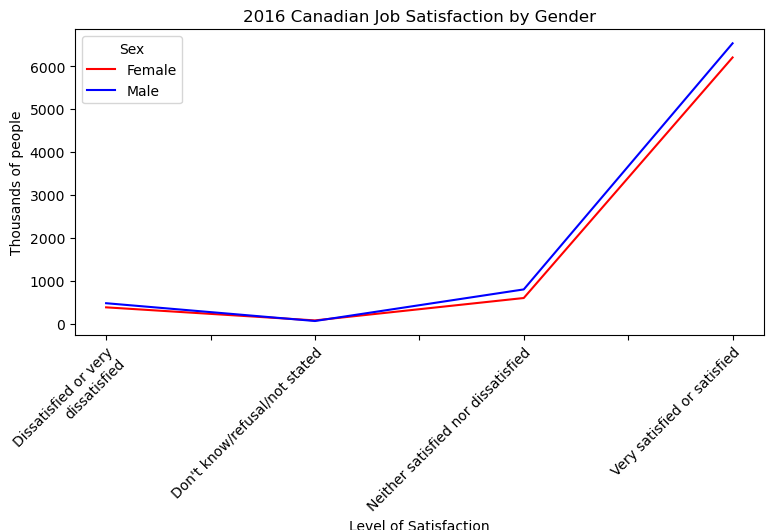

In [20]:
# line chart comparing job satisfaction responses from male vs female

get_canada = gen_canada.pivot(index="Response", columns="Sex", values="VALUE").plot(color=("red", "blue"), figsize=(8,5),
                                                                                    title="2016 Canadian Job Satisfaction by Gender", 
                                                                                    xlabel="Level of Satisfaction", 
                                                                                    ylabel="Thousands of people")

plt.xticks(rotation=45, wrap=True, ha="right")
plt.tight_layout()

plt.savefig("Images/gender_peeps_line.png")
plt.show()

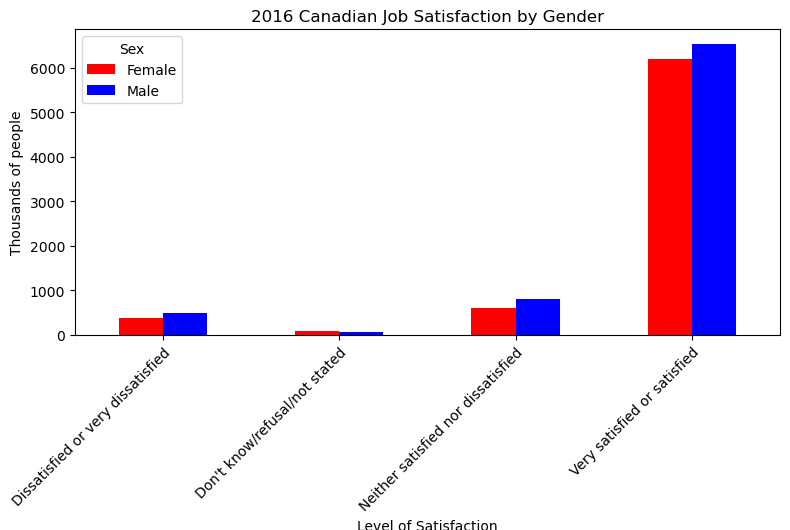

In [22]:
# bar chart comparing job satisfaction responses from male vs female

get_canada_bar = gen_canada.pivot(index="Response", columns="Sex", values="VALUE").plot(kind="bar", color=("red", "blue"), figsize=(8,5),
                                                                                    title="2016 Canadian Job Satisfaction by Gender", 
                                                                                    xlabel="Level of Satisfaction", 
                                                                                    ylabel="Thousands of people")

plt.xticks(rotation=45, wrap=True, ha="right")
plt.tight_layout()

plt.savefig("Images/gender_peeps_bar.png")
plt.show()

In [23]:
gen_sat_per = canada_percent[['GEO', 'Age group', 'Sex', 'Response', 'Estimates', 'VALUE']]
gen_sat_per.head()

,GEO,Age group,Sex,Response,Estimates,VALUE
COORDINATE,,,,,,
1.1.1.1.2,Canada,"Total, 15 years and over",Both sexes,"Total, job satisfaction",Percentage of persons,100.0
1.1.1.1.3,Canada,"Total, 15 years and over",Both sexes,"Total, job satisfaction","Low 95% confidence interval, percent",100.0
1.1.1.1.4,Canada,"Total, 15 years and over",Both sexes,"Total, job satisfaction","High 95% confidence interval, percent",100.0
1.1.1.8.2,Canada,"Total, 15 years and over",Both sexes,Very satisfied or satisfied,Percentage of persons,83.9
1.1.1.8.3,Canada,"Total, 15 years and over",Both sexes,Very satisfied or satisfied,"Low 95% confidence interval, percent",82.8


In [24]:
# focus on all of Canada,and total age group
gen_perc = gen_sat_per[(gen_sat_per["GEO"] == "Canada") &
                        (gen_sat_per["Age group"] == "Total, 15 years and over")]

# limit response selections
gen_perc_resp = gen_perc[(gen_perc["Response"] =="Very satisfied or satisfied") |
                         (gen_perc["Response"] =="Neither satisfied nor dissatisfied") |
                         (gen_perc["Response"] =="Dissatisfied or very dissatisfied") |
                         (gen_perc["Response"] =="Don't know/refusal/not stated")]

# limit to only percentage of persons and male/female
gen_perc_only = gen_perc_resp[(gen_perc_resp["Estimates"] == "Percentage of persons")]
gen_percent = gen_perc_only[(gen_perc_only["Sex"] != "Both sexes")]

gen_percent

,GEO,Age group,Sex,Response,Estimates,VALUE
COORDINATE,,,,,,
1.1.2.8.2,Canada,"Total, 15 years and over",Male,Very satisfied or satisfied,Percentage of persons,82.8
1.1.2.4.2,Canada,"Total, 15 years and over",Male,Neither satisfied nor dissatisfied,Percentage of persons,10.2
1.1.2.9.2,Canada,"Total, 15 years and over",Male,Dissatisfied or very dissatisfied,Percentage of persons,6.1
1.1.2.7.2,Canada,"Total, 15 years and over",Male,Don't know/refusal/not stated,Percentage of persons,0.9
1.1.3.8.2,Canada,"Total, 15 years and over",Female,Very satisfied or satisfied,Percentage of persons,85.2
1.1.3.4.2,Canada,"Total, 15 years and over",Female,Neither satisfied nor dissatisfied,Percentage of persons,8.3
1.1.3.9.2,Canada,"Total, 15 years and over",Female,Dissatisfied or very dissatisfied,Percentage of persons,5.3
1.1.3.7.2,Canada,"Total, 15 years and over",Female,Don't know/refusal/not stated,Percentage of persons,1.2


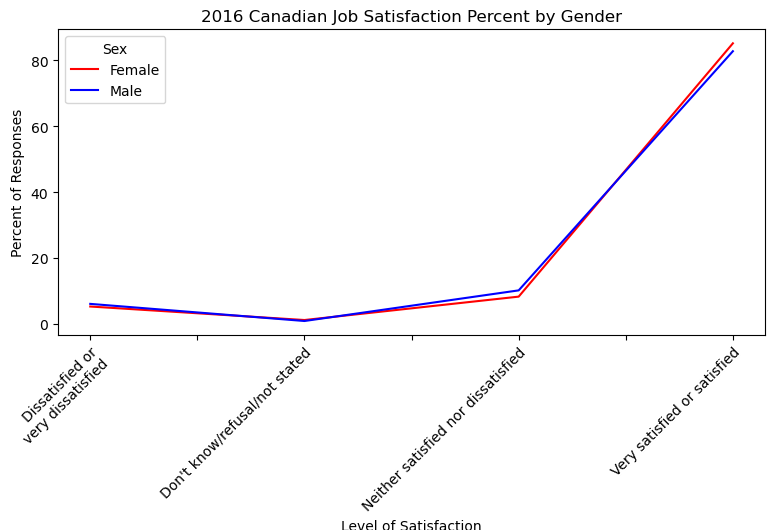

In [27]:
get_percent = gen_percent.pivot(index="Response", columns="Sex", values="VALUE").plot(color=("red", "blue"), figsize=(8,5),
                                                                                    title="2016 Canadian Job Satisfaction Percent by Gender", 
                                                                                    xlabel="Level of Satisfaction", 
                                                                                    ylabel="Percent of Responses")

plt.xticks(rotation=45, wrap=True, ha="right")
plt.tight_layout()

plt.savefig("Images/gender_percent_line.png")
plt.show()

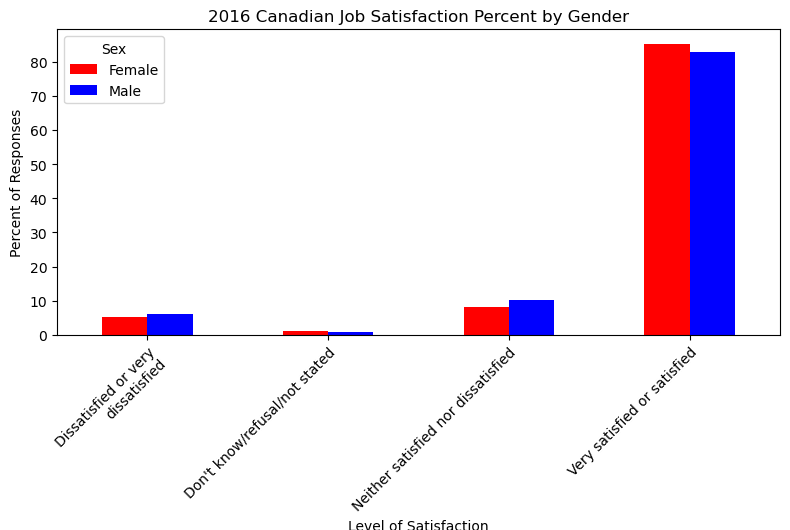

In [26]:
get_percent_bar = gen_percent.pivot(index="Response", columns="Sex", values="VALUE").plot(kind="bar", color=("red", "blue"), figsize=(8,5),
                                                                                    title="2016 Canadian Job Satisfaction Percent by Gender", 
                                                                                    xlabel="Level of Satisfaction", 
                                                                                    ylabel="Percent of Responses")

plt.xticks(rotation=45, wrap=True, ha="right")
plt.tight_layout()

plt.savefig("Images/gender_percent_bar.png")
plt.show()